<a href="https://colab.research.google.com/github/nezhalahnech/lfc-tweet-analysis/blob/master/Pr%C3%A1ctica_2_Evaluaci%C3%B3n_y_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2: Evaluación y kNN

Esta sesión práctica se divide en cuatro secciones de distinta complejidad. 

En la primera se explica la primera parte de evaluación en la cual se ve cómo usando la libreria *Scikit-Learn* se pueden separar los conjuntos de training y de testing.

En la segunda sección, y antes de continuar con la evaluación, es necesario tener un modelo, y para esta sesión vamos a usar el modelo kNN que hemos explicado ya en teoría. En este apartado veremos como se usa y que parámetros son susceptibles de cambio para obtener un resultado más óptimo.

En la tercera sección, se ven las diferentes estrategias de validación.

En la última parte se habla de como calcular las métricas que más se usan.

source: https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/

## Evaluación (parte I)

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados. El reparto debe hacerse de forma aleatoria o aleatoria-estratificada como se ha explicado en clase.

Además más adelante veremos como también necesitaremos dividir nuestro conjunto de datos en 3 partes: conjunto de entrenamiento, de test y de validación. Aunque ahora no necesitamos explicitamente estos tres grupos si que veremos como se crean.



### Obtenemos los datos

Primero cargamos las librerías que utillizaremos tanto para manejar los datos como crear gráficos.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

#esto determina como queremos que sean los gráficos 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

El conjunto de datos que vamos a usar es "*Wine Quality*", puedes ver más información [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Cargamos el archivo usando pandas. Este archivo contiene 1599 instancias sobre vinos. Cada instancia viene descrita por 11 características y una última variable que determina la calidad a la que pertenece el vino. Esta variable toma un valor natural entre 1 y 8.

In [77]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

Revisamos el contenido del archivo, para comprobar que datos son los que tenemos y cómo son.

In [78]:
# Mostrar las n primeras filas del dataset
print(df.head(4))
# Comprobamos la dimensión del dataset
print(df.shape)
# Obtenemos el tipo de cada una de sus características
df.info()

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6

[4 rows x 12 columns]
(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null 

Viendo la dimensión del dataset comprobamos que disponemos de 1599 instancias con 12 descriptores (características) cada una.

### Preprocesamos los datos

En esta asignatura no nos vamos a detener mucho en este punto, pero hay casos en los que es necesario hacer un poco de procesamiento como en este ejemplo.

Como variable objetivo, utilizaremos la calidad del vino.

Antes de hacer cualquier cosa sobre los datos hay que ver como son a través del cálculo estadístico para cada característica.

In [79]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Otra opción es ver en una gráfica las características para poder observar como son. En este caso, usaremos histogramas y gráficas de densidad para ver la frecuencia de los datos de cada característica.

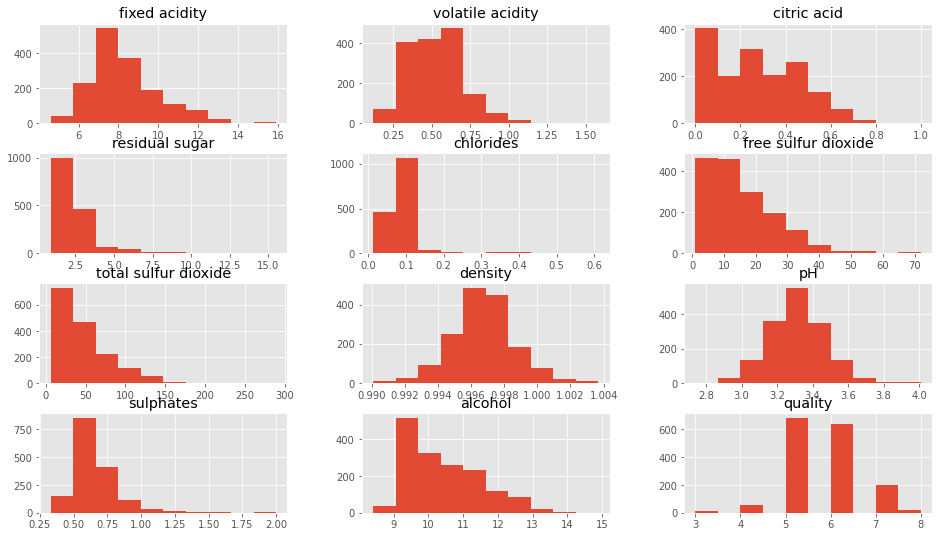

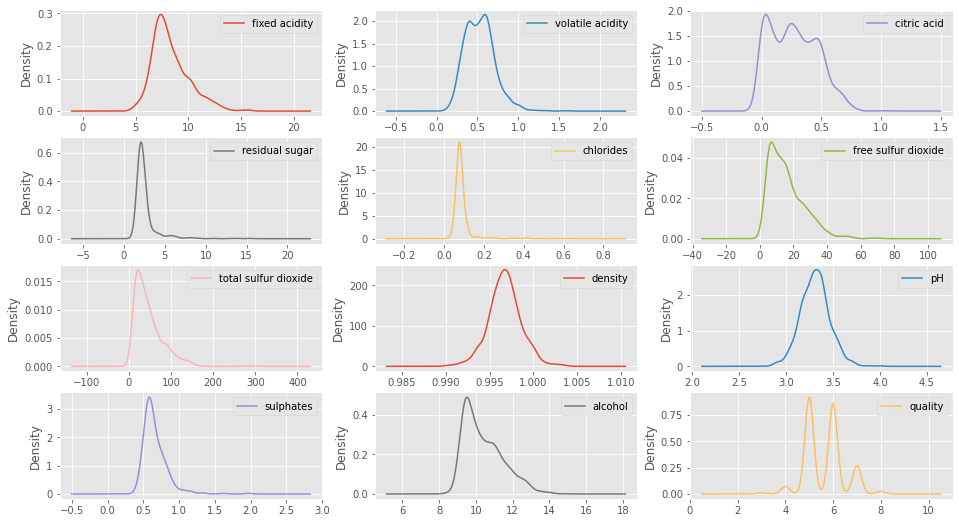

In [80]:
# Histograms
df.hist()
plt.show()

# Density
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

Las conclusiones que podemos sacar es que en la mayoría de las características los datos están acumulados en los valores más pequeños, sin embargo características como el *alcohol* o el *pH* tienen más forma de campana.

Esto nos ayuda a observar como son las características dentro de mi conjunto de datos. En este caso sobretodo, nos vamos a fijar en que las *features* no pertenecen a la misma escala y en la variable objetivo



PREGUNTA: ¿qué conclusión obtienes para la variable objetivo? 

respuesta:
La variable objetivo de un conjunto de datos es la característica de dataset, el algoritmo utiliza datos históricos para aprender patrones y descubrir relaciones entre otras features del dataset y la variable objetivo. Sin un objetivo etiquetado, los algoritmos no podrían asignar los datos disponibles a los resultados. Es importante tener un objetivo bien definido, ya que lo único que hace un algoritmo es aprender una función que mapea las relaciones entre los datos de entrada y el objetivo. Los resultados del modelo no tendrán sentido si la variable objetivo no tiene sentido. 


Una ayuda puede ser agrupar los valores y ver cuantos hay de cada clase de forma numérica. Muestra el valor de instancias para cada clase.

In [81]:
#Mostrar el valor de instancias para cada clase
df.value_counts()




fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

De hecho, vamos a abordar el problema como un problema de clasificación binario, de esta manera salvamos la desigualdad entre las clases. Para ello, vamos a dividir las instancias en "good" o "bad" en función de la calidad del vino, considerando que los vinos que estén entre (5,8] serán "good" y los de calidad menor que 5, serán "bad".

1    855
0    744
Name: quality, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


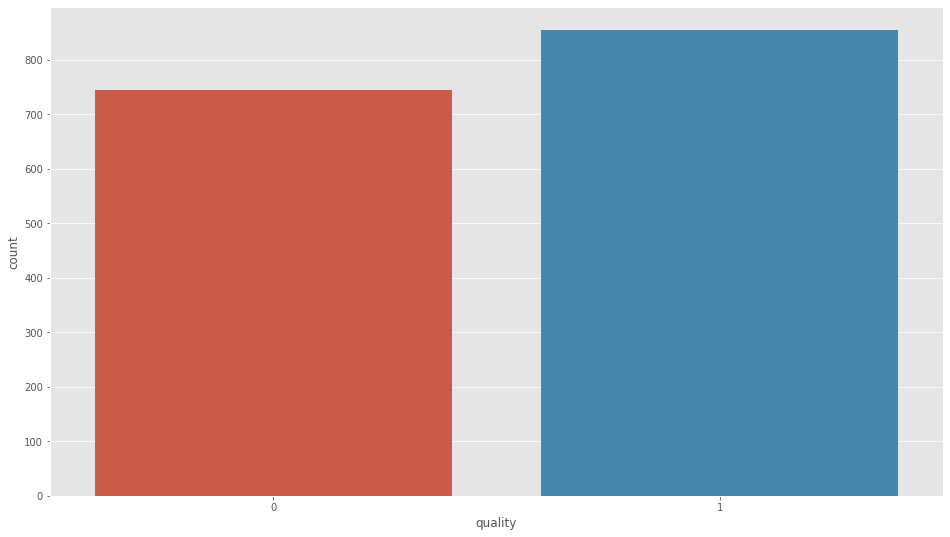

In [82]:
from sklearn.preprocessing import LabelEncoder
# Dividir las instancias del vino como 'good' y 'bad' a partir de la característica "quality"
bins = (2, 5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
# Asignamos una etiqueta a "quality"
label_quality = LabelEncoder()
# Bad tomará el valor 0 y good será el valor 1
df['quality'] = label_quality.fit_transform(df['quality'])
print(df['quality'].value_counts())
sb.countplot(df['quality'])
plt.show()

PREGUNTA: Se puede haber corregido el problema que veíamos antes en la variable objetivo ¿se ha arreglado?

respuesta: creeo que si, se arreglado

¿Qué crees que hubiera pasado si hubiéramos considerado como buenos los vinos de calidad mayor que 6?

respuesta: la qualidad del vino va salir solo "bad"

Vamos a continuar con el ejemplo y con el conjunto de datos tal y como está aunque no sea lo mejor ni lo más completo. 


Cargamos las librerías que vamos a necesitar para, primero separar nuestros datos en dos grupos (training y testing) y escalar todas las características.



In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

En la librería *sklearn.preprocessing* hay distintos métodos para escalar los datos, entre ellos:


*   teniendo en cuenta el mínimo y el máximo (*MinMaxScaler*)
*   estandarizando, obteniendo un conjunto de datos de media 0 y desviación estándar 1 (*StandardScaler*)

Para este ejemplo vamos a usar *StandardScaler*.


¡OJO! Antes de escalar los datos hay que separarlos.

Si no los separamos antes de escalar estaríamos usando en cierto modo los datos de entrenamiento para testeo y eso **no** puede ser.



Antes de separar el dataset en un conjunto para entrenar y otro para testear, tenemos que separar el conjunto de datos original de tal manera que tengamos los descriptores por un lado (X) y el valor objetivo (o clase) en otro (y).

In [84]:
#creamos una variable X que tendrá las características de nuestros datos menos la variable objetivo
X = df.drop('quality', axis=1)
#creamos una variable y que tendrá sólo la variable objetivo
y = df['quality']

Comprobamos las dimensiones y una descripción de lo que contienen X e y:

In [85]:
# Dimensión del conjunto X
X.shape

(1599, 11)

In [86]:
# Información sobre las columnas y el tipo del conjunto X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [87]:
# Dimensión del conjunto X
y.shape

(1599,)

In [88]:
y.dtypes

dtype('int64')

Una vez tenemos separado por un lado el conjunto de descriptores y por otro lado la variable objetivo, vamos a crear los conjuntos de entrenamiento y testeo.

Para ello usamos la instrucción train_test_split de la librería Scikit-learn, usamos train_size para definir el porcentaje de instancias que hay en el conjunto de entrenamiento. Tienes más información sobre esta instrucción [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [89]:
#creamos los conjuntos de entrenamiento y testeo (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.8, #se puede usar determinando el tamaño del conjunto de test "test_size"
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Para hacer cualquier cambio de escala o normalización sobre los datos, debemos, por un lado escalar el conjunto de entrenamiento, y utilizar esa escala usada para el conjunto de test o los siguientes conjuntos que obtengamos.

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Comprobamos ahora las dimensiones de los conjuntos que hemos creado

In [91]:
print("Xtrain ", X_train.shape)
print("ytrain ",y_train.shape)
print("Xtest ",X_test.shape)
print("ytest ",y_test.shape)

Xtrain  (1279, 11)
ytrain  (1279,)
Xtest  (320, 11)
ytest  (320,)


Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test.

In [92]:
y_train.value_counts()

1    683
0    596
Name: quality, dtype: int64

In [93]:
y_test.value_counts()

1    172
0    148
Name: quality, dtype: int64

En este caso. el porcentaje de clases no sale muy dispar como se puede comprobar. 

PREGUNTA: Prueba a poner en el atributo *random_state* del método *train_test_split* el valor 1234. ¿Se conserva la proporción de clases?

respuesta: no la proporcion de clases se reduce

Por defecto, el método *train_test_split* si no se le especifica lo contrario va a tratar de separar estratificando por clases.

Antes de continuar con la evaluación, y para poder usar un modelo el cuál conocemos para ver los distintos resultados vamos ver como usar el modelo **k-nearest neighbors**.

## kNN - k-Nearest Neighbors 

Como ya se vió brevemente en el Tema 1, en la Práctica 0, vamos a usar el algoritmo kNN (k-Nearest Neighbors), aunque hablaremos de él otra vez en el Tema 4 puedes encontrar más información [aquí](https://es.wikipedia.org/wiki/K_vecinos_m%C3%A1s_pr%C3%B3ximos).

Partimos de los datos tal y como los tenemos en este punto.
Tenemos los conjuntos de entrenamiento y testeo, así que podemos obtener el modelo. 
Para ello cargamos las librerías necesarias, en las que se incluye el modelo y las métricas con las que se va a evaluar.

In [94]:
# librería del modelo
from sklearn.neighbors import KNeighborsClassifier
# librerías para la evaluación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Por defecto, el número de vecinos que usa *KNeighborsClassifier* es 5, tienes la ayuda del método en este [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Para generar un modelo necesitamos hacer lo siguiente y esta estructura es igual para cualquier modelo que generemos usando la librería *sklearn*:

In [95]:
knn = KNeighborsClassifier() # determinamos el modelo que vamos a usar y cual es su configuración, en este caso usaremos los valores por defecto
knn.fit(X_train, y_train)

KNeighborsClassifier()

*KNeighborsClassifier* tiene un método que es *score* que devuelve la *accuracy*. 

De esta manera lo que hacemos usando el método *score* sobre el modelo, es que primero se prediga sobre el conjunto de datos X y luego compare el resultado con la variable objetivo (y).

En este caso la calculamos para cada uno de los conjuntos de train y de test.

In [96]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.74


PREGUNTA: ¿por qué crees que es más alto el valor obtenido con el conjunto de entrenamiento que con el de test?

respuesta:El conjunto de entrenamiento se utiliza para ajustar los modelos y el conjunto de test se utiliza para evaluar el error de generalización del modelo final elegido.por eso el valor de obtenido con training set mas alto a lo de test set

Obtenemos la matriz de confusión y las métricas para cada una de las clases de la variable objetivo. Para ello en lugar de hacer la predicción y la evaluación todo junto en la misma métrica, lo vamos a hacer por separado.

Primero predecimos sobre un conjunto, en este caso el conjunto de test:

In [97]:
# Obtenemos la predicción sobre el conjunto de test
pred = knn.predict(X_test)

Y sobre la predicción hecha, se calcula la matriz de confusión:

In [98]:
# Muestra la matriz de confusión
print(confusion_matrix(y_test, pred))

[[101  47]
 [ 35 137]]


Podemos usar el método *plot_confusion_matrix* que ofrece *sklearn.metrics* para tener una visualización más completa de la matriz de confusión ([+ info](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html))

[[101  47]
 [ 35 137]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


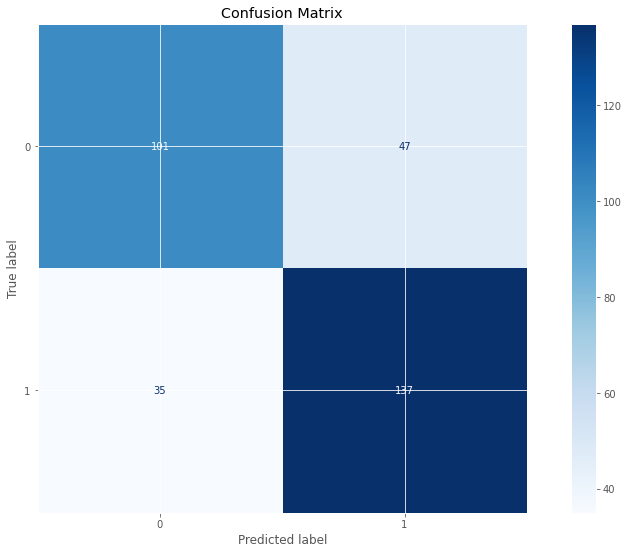

In [99]:
from sklearn.metrics import plot_confusion_matrix

title="Confusion Matrix"
disp = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(disp.confusion_matrix)

También se puede usar la predicción del conjunto para calcular cualquier otra métrica que necesitemos.

In [100]:
# Muestra un resumen de las métricas de evaluación del modelo
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       148
           1       0.74      0.80      0.77       172

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



EJERCICIO: crea un modelo considerando 7 vecinos y calcula sus métricas. ¿Ha mejorado en cuanto a *accuracy*? ¿y su *recall* y *precision*?

respuesta: accuracy ha mejorado de 0.69 a 0.74 y por el valor de precision y recall ha aumentado un poco tambien

In [101]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.75


In [102]:
pred = knn.predict(X_test)

In [103]:
# Muestra un resumen de las métricas de evaluación del modelo
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       148
           1       0.74      0.82      0.78       172

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.75       320
weighted avg       0.75      0.75      0.75       320



EJERCICIO: repite el proceso ahora para k=3 y contesta a las mismas preguntas teniendo en cuenta los dos modelos anteriores (el de k=5 y el de k=7). ¿Ha mejorado en cuanto a *accuracy*? ¿y su *recall* y *precision*? 

respuesta: el valor de accuracy es 0.73, recall y precicion su valor ha bajado un poco 

In [104]:
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.73


In [105]:
pred = knn.predict(X_test)

In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       148
           1       0.74      0.77      0.75       172

    accuracy                           0.73       320
   macro avg       0.73      0.72      0.73       320
weighted avg       0.73      0.73      0.73       320



PREGUNTA: ¿Cuál de las tres configuraciones es mejor? ¿por qué? Asegúrate que estás evaluando en el conjunto de datos correcto.

resouesta: creo que la configuracion k=3 es la mejor porque siempre que el valor de k es pequeño, selecciona los vecinos más cercanos. Por lo tanto, es mejor usar este valor de k

NOTA: La configuración que determines como la mejor, será la que uses el resto de la práctica.

Una manera de saber cuál es la k que mejor modelo genera, es aplicar el modelo a un rango de k, y ver cual es el resultado que sale para cada una de esas k, y quedarnos con aquella que obtenga el mejor valor.


EJERCICIO OPCIONAL: implementa un bucle que recorra de 1 a 30 los valores de k. 
Crea una gráfica que represente estos valores dónde el eje x sea los valores de k y el eje y el valor de la accuracy obtenido con ese valor.
¿Qué valor de k elegirías para crear el modelo definitivo basándote en la *accuracy*? ¿por qué?

EJERCICIO OPCIONAL: Por defecto *KNeighborsClassifier* usa la distancia euclidea para calcular la distancia entre las instancias. Prueba con la distancia Manhattan, ¿vale el mismo valor de k que has seleccionado antes? ¿por qué? ¿cuál es la mejor accuracy que se obtiene?

PREGUNTA OPCIONAL (si has realizado los ejercicios opcionales): después de lo visto hasta ahora completa los siguientes parámetros con la mejor opción que consideres para este problema:



*   valor de k:
*   tipo de distancia:

NOTA: Si haces los ejercicios opcionales, quédate con la mejor configuración para el modelo entre todas (incluidas estas) para realizar el resto de la práctica.




## Evaluación (parte II)

Vamos a seguir con la evaluación del modelo, como podrás ver las decisiones que se van tomando influyen en los pasos siguientes y la evaluación de la métrica final puede llevar a cambiar alguna de las decisiones tomadas al principio. Por eso es importante ir tomando decisiones y llevándolas acabo de manera ordenada.


A partir de ahora cuando creemos un modelo vamos a trabajar con los parámetros del modelo k-NN que has elegido en el apartado anterior.

EJERCICIO: hasta este momento la partición que hemos hecho del conjunto de training y de testing ha sido de un 80-20% respectivamente.

Calcula la *accuracy* con el modelo k-NN, con la configuración escogida, para conjuntos de training y de testing, en primer lugar de 90-10% y luego de 75-25%.

Teniendo en cuenta la accuracy obtenida también con el reparto 80-20%, ¿cuál es la partición que ha obtenido mejor *accuracy*?

***Calcula de la accuracy con el modelo k-NN, con la configuración escogida, para conjuntos de training y de testing,  90-10%***

In [107]:
#creamos los conjuntos de entrenamiento y testeo (90-10%)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.9, #se puede usar determinando el tamaño del conjunto de test "test_size"
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [108]:
#escalar el conjunto de entrenamiento, y utilizar esa escala usada para el conjunto de test o los siguientes conjuntos que obtengamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
#Comprobamos ahora las dimensiones de los conjuntos que hemos creado
print("Xtrain ", X_train.shape)
print("ytrain ",y_train.shape)
print("Xtest ",X_test.shape)
print("ytest ",y_test.shape)

Xtrain  (1439, 11)
ytrain  (1439,)
Xtest  (160, 11)
ytest  (160,)


In [110]:
#verificar que la distribución de la variable
y_train.value_counts()

1    769
0    670
Name: quality, dtype: int64

In [111]:
y_test.value_counts()

1    86
0    74
Name: quality, dtype: int64

**kNN - k-Nearest Neighbors**

In [112]:
#KNeighborsClassifier tiene un método que es score que devuelve la accuracy
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.72


In [113]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[52 22]
 [23 63]]
              precision    recall  f1-score   support

           0       0.69      0.70      0.70        74
           1       0.74      0.73      0.74        86

    accuracy                           0.72       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.72      0.72      0.72       160



***Calcula de la accuracy con el modelo k-NN, con la configuración escogida, para conjuntos de training y de testing,  75-25%***

In [114]:
#creamos los conjuntos de entrenamiento y testeo (75-25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        train_size   = 0.75, #se puede usar determinando el tamaño del conjunto de test "test_size"
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [115]:
#escalar el conjunto de entrenamiento, y utilizar esa escala usada para el conjunto de test o los siguientes conjuntos que obtengamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
#Comprobamos ahora las dimensiones de los conjuntos que hemos creado
print("Xtrain ", X_train.shape)
print("ytrain ",y_train.shape)
print("Xtest ",X_test.shape)
print("ytest ",y_test.shape)

Xtrain  (1199, 11)
ytrain  (1199,)
Xtest  (400, 11)
ytest  (400,)


In [117]:
#verificar que la distribución de la variable
y_train.value_counts()

1    644
0    555
Name: quality, dtype: int64

In [118]:
y_test.value_counts()

1    211
0    189
Name: quality, dtype: int64

**kNN - k-Nearest Neighbors** 

In [119]:
#KNeighborsClassifier tiene un método que es score que devuelve la accuracy
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.72


In [120]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[126  63]
 [ 47 164]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       189
           1       0.72      0.78      0.75       211

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400



**NOTA:**
Si además de nuestro conjunto de datos original, queremos separar otro conjunto de datos para hacer una validación posterior del modelo, esto lo podemos hacer apartando de uno de los conjuntos de entrenamiento o test, un subconjunto de instancias u observaciones.

En este caso queremos usar el 75% de los datos para entrenar, un 15% de los datos para validar, y cuando ya tengamos un modelo elegido, usaremos un 10% de los datos para testearlo.

Para conseguir estos conjuntos, primero separamos los datos en dos conjuntos, uno con el 75% de las instancias que será el conjunto de entrenamiento, y otro con el 25% restante que será un conjunto auxiliar del cuál obtendremos luego los conjuntos de test y validación.
En la Práctica 0 lo vimos al revés, separamos un conjunto para entrenar y otro para testear, y del conjunto de entrenamiento, separamos de nuevo en un conjunto para validar, y el definitivo para testear. Las dos estrategias son buenas y puedes usar la que mejor comprendas. Ya que en la práctica 0 lo tenemos de una manera, aquí vamos a verlo de la otra.

In [121]:
#primero se separa en dos conjuntos de datos "train" y "aux"
X_train, X_aux, y_train, y_aux = train_test_split(X,y,
                                        train_size   = 0.75,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Mostramos la dimensión de los conjuntos para comprobar que es correcto
print("Xtrain ", X_train.shape)
print("ytrain ",y_train.shape)
print("Xaux ",X_aux.shape)
print("yaux ",y_aux.shape)

Xtrain  (1199, 11)
ytrain  (1199,)
Xaux  (400, 11)
yaux  (400,)


Ahora, a partir del conjunto auxiliar tenemos que obtener los conjuntos de validación y test, respectivamente han de ser el 15% y el 10% de los datos del dataset original.

El porcentaje que tenemos que calcular ahora es sobre el 100% de los datos del conjunto auxiliar y para obtener la partición que queremos debemos de tener en cuenta que el porcentaje que buscamos es igual a %test/(%val+%test) en nuestro ejemplo sería 0.15/(0.15+0.10)=0.15/0.25=0.6, es decir, el 60% de los datos del conjunto auxiliar serán para validar y el resto para testear.

In [122]:
#segundo separamos el conjunto "aux" en dos conjuntos "test" y "val"
X_val, X_test, y_val, y_test = train_test_split(X_aux,y_aux,
                                        train_size   = 0.6,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Mostramos la dimensión de los conjuntos para comprobar que es correcto
print("Xval ",X_val.shape)
print("yval ",y_val.shape)
print("Xtest ", X_test.shape)
print("ytest ",y_test.shape)

Xval  (240, 11)
yval  (240,)
Xtest  (160, 11)
ytest  (160,)


EJERCICIO: repartir los datos de tal forma que la relación sea 90-7-3% y luego 60-30-10%, para entrenar, validar y testear respectivamente. Evalua tanto el conjunto de test como el de validación, con el modelo generado con el conjunto de training en cada caso para el modelo kNN con los parámetros establecidos al final de la sección anterior.

In [123]:
#segundo separamos el conjunto "aux" en dos conjuntos "test" y "val"
X_val, X_test, y_val, y_test = train_test_split(X_aux,y_aux,
                                        train_size   = 0.9,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Mostramos la dimensión de los conjuntos para comprobar que es correcto
print("Xval ",X_val.shape)
print("yval ",y_val.shape)
print("Xtest ", X_test.shape)
print("ytest ",y_test.shape)

Xval  (360, 11)
yval  (360,)
Xtest  (40, 11)
ytest  (40,)


In [124]:
#segundo separamos el conjunto "aux" en dos conjuntos "test" y "val"
X_val, X_test, y_val, y_test = train_test_split(X_aux,y_aux,
                                        train_size   = 0.6,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Mostramos la dimensión de los conjuntos para comprobar que es correcto
print("Xval ",X_val.shape)
print("yval ",y_val.shape)
print("Xtest ", X_test.shape)
print("ytest ",y_test.shape)

Xval  (240, 11)
yval  (240,)
Xtest  (160, 11)
ytest  (160,)


### Validación Simple

Es el método más sencillo consiste en dividir aleatoriamente las observaciones disponibles en dos grupos, uno se emplea para entrenar al modelo y otro para evaluarlo. Se realiza como hemos visto hasta este punto.

### Leave One Out Cross-Validation (LOOCV)

El método LOOCV en un método iterativo que se inicia empleando como conjunto de entrenamiento todas las observaciones disponibles excepto una, que se excluye para emplearla como validación.

El método que vamos a usar es *LeaveOneOut* que se encuentra en la librería *Scikit-Learn* dendro del módulo *model_selection*.

In [125]:
from sklearn.model_selection import LeaveOneOut

Creamos el procedimiento para realizar el método interativo LOOCV

In [126]:
# crear el procedimiento loocv 
loocv = LeaveOneOut()

La función *get_n_splits* nos muestra el número particiones (iteraciones) que ha hecho (n-1 muestras para train y 1 para validar). En este caso siempre ha de coincidir con el número de instancias de la muestra.

In [127]:
loocv.get_n_splits(X)

1599

Al llamar a la función *split* del procedimiento *loocv* lo que devuelve son los índices de las estancias que van a ser usadas para entrenar, y el índice de instancia que va a ser usada para testear. 
De esta manera podemos recorrer todas las opciones posibles usando un bucle for de la siguiente manera:

In [128]:
for train_index, test_index in loocv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   1    2    3 ... 1596 1597 1598] TEST: [0]
TRAIN: [   0    2    3 ... 1596 1597 1598] TEST: [1]
TRAIN: [   0    1    3 ... 1596 1597 1598] TEST: [2]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [3]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [4]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [5]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [6]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [7]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [8]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [9]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [10]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [11]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [12]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [13]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [14]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [15]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [16]
TRAIN: [   0    1    2 ... 1596 1597 1598] TEST: [17]
TRAIN: [   0    1    2 ... 1596 1597 1

Creamos dentro del bucle cada uno de los conjuntos necesarios para poder aplicar luego un modelo *Xtrain, Xtest, ytrain, ytest*. 

In [129]:
for train_index, val_index in loocv.split(X):
  # añadimos cada instancia a su conjunto a través de los índices
  X_train, X_val = X.iloc[train_index], X.iloc[val_index] 
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  print(X_train, X_val, y_train, y_val)

Se han truncado las últimas 5000 líneas del flujo de salida.
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1598, dtype: int64 1426    1
Name: quality, dtype: int64
      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3  

Para ver la estructura de uso completa de este sistema de validación, vamos a usar el algoritmo k-nn con los parámetros elegidos. Para ello completa el siguiente código con modelo que hayas determinado.

In [135]:
#creamos dos variables que son listas vacías para poder ir guardando la clase verdadera de cada instancia y su valor predicho
#y_true, y_pred = list(), list() 
y_true=[]
y_pred= []
for train_index, val_index in loocv.split(X):
  # añadimos cada instancia a su conjunto a través de los índices
  X_train, X_val = X.iloc[train_index], X.iloc[val_index] 
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  # crear el modelo
  model = KNeighborsClassifier()
  model.fit(X_train, y_train)
	# testear el modelo
  yhat = model.predict(X_val)
	# almacenar los datos predichos y los datos que conocemos 
  y_true.append(y_val.values[0])
  y_pred.append(yhat[0])
 

PREGUNTA: ¿Cuál será la dimensión de las variables *y_true* e *y_pred*? 
Compruébalo.

In [136]:
len(y_pred)

1599

En este caso para calcular la *accuracy* vamos a usar el método *accuracy_score* que se encuentra dentro del módulo *metrics* de la librería Scikit-Learn. 

In [131]:
from sklearn.metrics import accuracy_score
# calcular accuracy
acc = accuracy_score(y_true, y_pred) #comparamos el valor real con las predicciones
print('Accuracy: %.3f' % acc)

Accuracy: 0.660


PREGUNTA: ¿qué explicación le das al valor de *accuracy* obtenido? No pierdas este valor de vista que lo compararemos con el resto de estrategias de validación.

respuesta: La precisión general es del 0,660, lo que podría no ser tan malo. La precisión es difícil de interpretar para clases individuales en una clase múltiple.

###k-fold Cross Validation

El método *k-Fold Cross-Validation* es también un proceso iterativo. Consiste en dividir los datos de forma aleatoria en k grupos de aproximadamente el mismo tamaño, k-1 grupos se emplean para entrenar el modelo y uno de los grupos se emplea como validación. Este proceso se repite k veces utilizando un grupo distinto como validación en cada iteración. El proceso genera k estimaciones del error cuyo promedio se emplea como estimación final.

Cargamos las librerías que vamos a necesitar.

In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

Un buen valor para el número de repeticiones depende del conjunto de datos y del ruido que contenga. Un valor de 3, 5 o 10 repeticiones probablemente sea un buen comienzo. Probablemente no se requieran más repeticiones de 10.

Vamos a probar con k=5 para empezar. Completa el siguiente código para el modelo kNN y los parámetros que has escogido.

Fíjate en que la *accuracy* que se observa es la media de las *accuracies* obtenidas en cada iteración.

In [134]:
# preparar el procedimiento de cross-validation 
cv = KFold(n_splits=5)
# crear el modelo
model = KNeighborsClassifier()
# evaluar el modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# mostrar el resultado
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.588 (0.027)


EJERCICIO: mira en la ayuda del método kFold si por defecto esta estrategia de validación mezcla las muestras en cada iteración. Prueba lo contrario a lo que ocurra por defecto y dí si influye en el resultado que los datos estén mezclados o no. 

### Repeticiones de k-fold Cross Validation

Es exactamente igual al método *k-Fold-Cross-Validation* pero repitiendo el proceso completo n veces. Por ejemplo, *10-Fold-Cross-Validation* con 5 repeticiones implica a un total de 50 iteraciones ajuste-validación, pero no equivale a un *50-Fold-Cross-Validation*.

La método que se necesita forma parte de *sklearn.model_selection* y se llama *RepeatedKFold*.

In [139]:
from sklearn.model_selection import RepeatedKFold

EJERCICIO: busca en la ayuda de la librería y completa el siguiente código para obtener la *accuracy* de una *10-Fold-Cross-Validation*.

In [141]:
from numpy.ma.core import log
from sklearn.linear_model import LogisticRegression
# preparar el procedimiento de cross-validation 
cv =KFold(n_splits=10, random_state=1, shuffle=True)
# crear el modelo
model = LogisticRegression()
# evaluar el modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# mostrar el resultado
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.747 (0.039)


### Stratified k-fold Cross Validation

Statified K-fold es una variante mejorada de K-fold, que cuando hace los *splits* (las divisiones) del conjunto de train tiene en cuenta mantener equilibradas las clases. Esto es muy útil, porque si por ejemplo tenemos que clasificar en “SI/NO” y una de las iteraciones del K-fold  tuviera muestras con etiquetas sólo “SI” el modelo no podría aprender a generalizar y aprendería que para cualquier entrada hay que responder “SI”.

El método a utilizar se llama *StratifiedKFold* y se encuentra en *sklearn.model_selection*. 


EJERCICIO: Crea el código siguiendo el mismo esquema que hasta ahora usando un *Stratified-10-Fold*, usa el modelo kNN con los parametros que has predeterminado, y calcula su *accuracy*. 

Recuerda, que en el caso de que la mezcla de los datos no se haga por defecto, es recomendable hacerla.

In [143]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=True)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 

Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]
Train: [   3    4    5 ... 1596 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1595 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1594 1595 1596] Validation: [1598]
Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]
Train: [   0    1    2 ... 1596 1597 1598] Validation: [1598]


In [144]:
# preparar el procedimiento de cross-validation 
cv = KFold(n_splits=5)
# crear el modelo
model = KNeighborsClassifier()
# evaluar el modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# mostrar el resultado
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.588 (0.027)


### Shuffle Split

Esta estrategia es muy parecida a la conmumente utilizada *train_test_split*. 


EJERCICIO OPCIONAL: lee en que se diferencia del resto y como se usa. Desarrolla un ejemplo como los hechos hasta ahora dónde uses este método y calcules la *accuracy* para el modelo kNN.

En la segunda parte de esta práctica has fijado unos parámetros óptimos para el modelo kNN, vuelve a escribirlos:


*   

Para ese modelo has probado las distintas estrategias de validación.
De todas las estrategias vistas, ¿cuál es la que mejor resultado en términos de *accuracy* ha dado? ¿Cuáles son los parámetros que has usado? Indica el valor de *accuracy*. 

## Evaluación (parte III)

### Métricas

En este apartado vamos a ver cómo obtener las distintas métricas de evaluación. 

En lugar de usar el problema anterior como un problema de clasificación binario, vamos a volver a cargarlo y usar la variable objetivo 'quality' sin agrupar, dejando así un problema de clasificación multiclase. 

Como hemos visto en teoría, el caso de la clasificación binaria es un caso particular de la clasificación multiclase, por eso que vamos a ver las métricas para un problema de este tipo.

Volvemos a cargar el conjunto de datos para empezar de nuevo.

In [151]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

Es una buena costumbre, echar un vistazo siempre, y antes de empezar a nuestros datos.

EJERCICIO: Completa el código

In [162]:
# Mostrar las 10 primeras filas del dataset
print(df.head(10))
# Comprobamos la dimensión del dataset
print(df.shape)
# Obtenemos el tipo de cada una de sus características
df.info()

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5
5            7.4              0.66         0.00  ...       0.56      9.4        5
6            7.9              0.60         0.06  ...       0.46      9.4        5
7            7.3              0.65         0.00  ...       0.47     10.0        7
8            7.8              0.58         0.02  ...       0.57      9.5        7
9            7.5              0.50         0.36  ...       0.80     10.5        5

[10 rows x 12 columns]
(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries,

Recuerda que hay que separar el conjunto de datos por un lado tiene que estar la variable con todas las características y por otro, la variable objetivo, en este caso es la variable 'quality'.

EJERCICIO: Completa el código

In [161]:
#creamos una variable X que tendrá las características de nuestros datos menos la variable objetivo
# Separar las características (X) y la variable objetivo o clase (y)
X = df.drop('quality', axis=1)

#creamos una variable y que tendrá sólo la variable objetivo
y = df.quality

Crea el conjunto de entrenamiento y test dejando un 80-20% respectivamente en cada conjunto.

EJERCICIO: Completa el código

In [146]:
#creamos los conjuntos de entrenamiento y testeo (80-20%)
# ................

En el rápido vistazo que hemos visto de la cabecera de nuestro conjunto de datos, hemos podido apreciar que la escala de las distintas características no es la misma, así que es recomendable escalar los datos. Para ello vamos a estandarizar ("normalizar") los datos haciendo que su media sea 0 (centrándolos en 0) y con una desviación estándar de 1.

Reucerda que has de escalar primero el conjunto de train y luego con la escala utilizada en ese conjunto aplicarlo al conjunto de test.

EJERCICIO: Completa el código

In [147]:
# Escala los conjuntos de train y test centrandolos en 0 y obteniendo una desviación estándar de 1
# ................

Para empezar vamos a usar el modelo kNN con todos sus parámetros con los valores por defecto. 

Obtén la predicción para el conjunto de test.

EJERCICIO: Completa el código

In [148]:
# Creamos el modelo
knn = KNeighborsClassifier()
# ................

In [149]:
# Obtenemos la predicción sobre el conjunto de test
# ................

Dentro de la librería *sklearn.metrics* está el método *confusion_matrix* que nos devuelve la **matriz de confusión**. Los parámetros de este método son los valores reales y los valores que se han predicho.

In [150]:
# Muestra la matriz de confusión
print(confusion_matrix(y_test, y_pred)) #si no has llamado así a las variables, cambialas

ValueError: ignored

Cómo hemos visto antes, el método anterior devuelve de una manera rápida pero un tanto 'fea' (para gusto los colores) la matriz de confusión. 
Otra manera de obtenerla sería de la siguiente forma, usando el método *plot_confusion_matrix*, cuyos parámetros son el modelo, y el conjunto de test con su variable objetivo. El último parámetro es la escala de colores para que se pinte el *heat map* dentro de la matriz. Puedes probar a cambiarlo.

Este método a diferencia del otro calcula los datos predichos dentro del propio método.

In [ ]:
from sklearn.metrics import plot_confusion_matrix

title="Confusion Matrix"
disp = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(disp.confusion_matrix)

Cómo se ha visto antes los propios modelos tienen un método que se llama *score* que devuelve la ***accuracy*** (1). 

Esta métrica también se puede obtener a partir de la librería *sklearn.metrics* usando *accuracy_score* (2).

In [ ]:
# (1) Obtener la accuracy del conjunto de test usando el método del modelo
knn.score(X_test, y_test)

In [ ]:
# (2) Obtener la accuracy del cjto de test usando sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Si usamos el método *accuracy_score* podemos, además, ver el número de instancias bien clasificadas si ponemos el parámetro *normalize* a falso. 

In [ ]:
accuracy_score(y_test, y_pred,normalize=False)

PREGUNTA: Nuestro problema, como hemos dicho es un problema multiclase, fijándote en la matriz de confusión, ¿encuentras razonado la *accuracy* tan baja que sale?

Hay distintas maneras de obtener las métricas ***recall, precision y F1-score***. Veamos dos de ellas. La primera es obtener las métricas de manera independiente.

Recuerda que para los problemas de clasificación multiclase estas métricas pueden ser calculadas como la media de las métricas de cada clase (**micro**), tenidas en cuenta todas juntas como conjunto (**macro**), o teniendo en cuenta el número de instancias de cada clase para darles un peso (**weighted**).

Fíjate en el siguiente código. Los métodos que vamos a usar están en la librería [*sklearn.metrics*](https://scikit-learn.org/stable/modules/model_evaluation.html)); es importante especificar en el parámetro *average* cuál es la estrategia a seguir para calcular cada uno.

EJERCICIO: Completa el código para calcular el resto de métricas.


In [ ]:
#importar los métodos que necesitamos precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(#..................................))
print('Macro Recall: {:.2f}'.format(#..................................))
print('Macro F1-score: {:.2f}\n'.format(#..................................))

print('Weighted Precision: {:.2f}'.format(#..................................))
print('Weighted Recall: {:.2f}'.format(#..................................))
print('Weighted F1-score: {:.2f}'.format(#..................................))

Otra manera de obtener las métricas, es obtenerlas como un informe usando el método *classification_report*

In [ ]:
from sklearn.metrics import classification_report
target_names = ['3 level', '4 level', '5 level', '6 level','7 level','8 level']
print(classification_report(y_test, y_pred, target_names=target_names))

Para calcular el *área bajo la curva* (***auROC***) hay que tener en cuenta si nuestro problema es de clasificación binaria, multiclase o multietiqueta. En cualquier caso se puede calcular pero teniendo en cuenta ciertas restricciones (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score))

El problema de este ejemplo es un problema multiclase así que vamos a calcular el *auROC* utilizando el método *roc_auc_score* especificando como queremos que sea el estudio de las clases. Principalmente hay dos estrategias:

*    'ovr' (*one-vs-rest*): calcula la *auROC* de cada clase contra el resto
*     'ovo' (*one-vs-one*): calcula la media de las *auROC* de todas las posibles combinaciones por pares de las clases.

A continuación vemos el ejemplo de uso de este método y los resultados obtenidos.

Para ello en lugar de calcular las predicciones es necesario calcular la probabilidad que tiene cada instancia de pertenecer a una clase. De hecho la mayor de las probabilidades es la que marca a que clase va a pertenecer la instancia.

Para ello hay que usar el método *predict_proba* del propio modelo.

In [ ]:
y_prob=knn.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

EJERCICIO: Antes has determinado una configuración óptima para el problema de clasificación binaria (la clase objetivo era "good" o "bad"). Comprueba si esa misma configuración mejoran el resultado obtenido con los parámetros por defecto usados antes, para el problema de clasificación multiclase que tenemos ahora, crea el modelo y obtén su matriz de confusión y su *accuracy*.

EJERCICIO OPCIONAL: vuelve a obtener un problema de **clasificación binario** separando la variable objetivo en dos clases "good" y "bad" como hemos hecho antes. 

Para el método kNN con los parámetros seleccionados como los más óptimos y usando la estrategia de validación que has elegido como la mejor, calcula la matriz de confusión, y las métricas recall, precision, F1-score y el valor de auROC y su gráfica. 

Reescribe todo lo que necesites para que quede el proceso de manera ordenada y legible, a continuación tienes una nota dónde puedes ver todas las partes del flujo de trabajo típico de un problema de Machine Learning y que debería verse reflejado en este ejercicio.




### Nota

El último ejercicio propuesto es un ejemplo de un proceso completo de aplicación de un método de aprendizaje supervisado. Repasando el flujo de trabajo nos quedaría algo así:


*   **"Identificar el problema:"** queremos predecir la calidad del vino (good o bad) en función de una serie de características de éste.
*   **"Obtener los datos: compilar preparar"**: observamos como son los datos que tenemos y en este caso los escalamos centrandolos en 0 y dejando una desviacion estándar de 1
*   **"Modelar y procesar los datos"**: utilizamos una estrategia de validación para obtener el mejor modelo. Lo obtenemos y lo usamos para predecir el conjunto de test.
*   **"Evaluar e interpretar los datos"**: usamos las métricas de evaluación para comprobar como es de óptimo nuestro modelo y si se obtiene un nivel de los resultados asumible por el problema planteado.